In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
# Define the coefficient matrix A and the right-hand side vector b
A = np.array([[5, 2], [2, 3]])
b = np.array([-2, 4])

In [46]:
# Define the objective function f(x)
def objective_function(x):
    return 0.5 * np.dot(np.dot(x.T, A), x) - np.dot(b.T, x)

In [47]:
# Define the gradient of the objective function
def gradient(x):
    return np.dot(A, x) - b


In [48]:
# Define the conjugate gradient method
def conjugate_gradient(A, b, x0, max_iter=1000, tol=1e-6):
    xs=[]
    x = x0
    r = b - np.dot(A, x)
    p = r
    xs.append(x)
    for i in range(max_iter):
        alpha = np.dot(r.T, r) / np.dot(np.dot(p.T, A), p)
        x = x + alpha * p
        xs.append(x)
        r_new = r - alpha * np.dot(A, p)
        beta = np.dot(r_new.T, r_new) / np.dot(r.T, r)
        p = r_new + beta * p
        r = r_new
        if np.linalg.norm(r) < tol:
            break
    return x,xs

In [49]:
# Define the steepest gradient descent method
def steepest_gradient_descent(A, b, x0, max_iter=1000, tol=1e-6, step_size=0.01):
    xs=[]
    x = x0
    xs.append(x)
    for i in range(max_iter):
        grad = gradient(x)
        x = x - step_size * grad
        xs.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return x,xs

In [50]:
# Generate points for contour plot
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)
for i in range(len(x_range)):
    for j in range(len(y_range)):
        Z[i, j] = objective_function(np.array([X[i, j], Y[i, j]]))


Text(0, 0.5, 'x2')

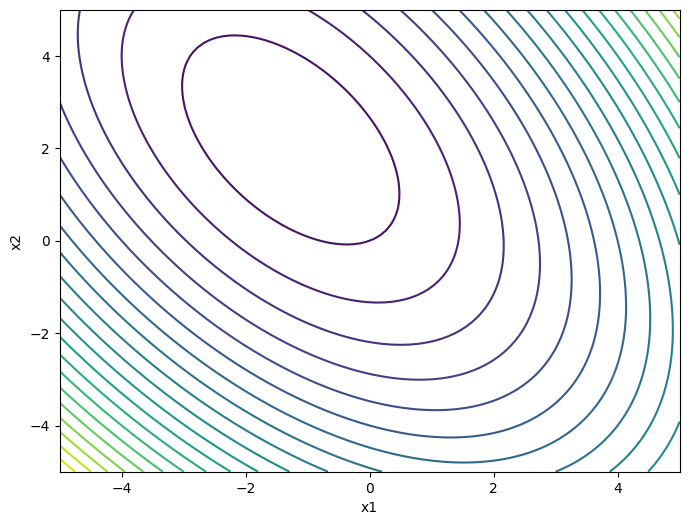

In [51]:
# Plot contours of the objective function
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.xlabel('x1')
plt.ylabel('x2')


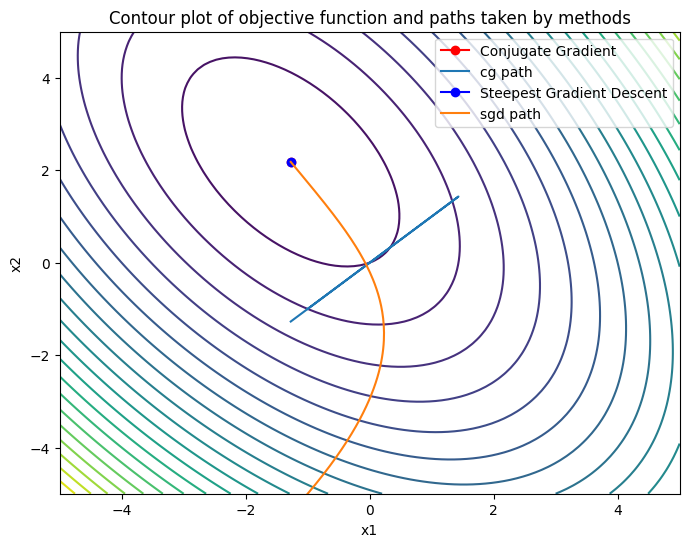

[-1.27272727  2.18181818]
[-1.27272698  2.18181771]
[array([-1, -5]), array([ 1.43251534, -1.07055215]), array([-1.27272727,  2.18181818])]
[array([-1, -5]), array([-0.87, -4.79]), array([-0.7507, -4.5889]), array([-0.641387, -4.396219]), array([-0.54139327, -4.21150469]), array([-0.45009351, -4.03433168]), array([-0.3669022 , -3.86429986]), array([-0.2912711 , -3.70103282]), array([-0.22268688, -3.54417642]), array([-0.16066901, -3.39339739]), array([-0.10476761, -3.24838208]), array([-0.05456159, -3.10883527]), array([-0.00965681, -2.97447898]), array([ 0.03031561, -2.84505147]), array([ 0.06570086, -2.72030624]), array([ 0.09682194, -2.60001107]), array([ 0.12398107, -2.48394718]), array([ 0.14746096, -2.37190838]), array([ 0.16752608, -2.26370035]), array([ 0.18442378, -2.15913986]), array([ 0.19838539, -2.05805414]), array([ 0.2096272 , -1.96028023]), array([ 0.21835145, -1.86566436]), array([ 0.22474716, -1.77406146]), array([ 0.22899103, -1.68533456]), array([ 0.23124817, -1.599

In [54]:
# Initial guess for the solution
x0 = np.array([-1, -5])
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.xlabel('x1')
plt.ylabel('x2')
# Solve the system using conjugate gradient without preconditioning
x_cg,xs_cg = conjugate_gradient(A, b, x0)
plt.plot(x_cg[0], x_cg[1], 'ro-', label='Conjugate Gradient')
plt.plot(np.array(xs_cg).T[0],np.array(xs_cg).T[0],label='cg path')

# Solve the system using steepest gradient descent
x_sgd,xs_sgd = steepest_gradient_descent(A, b, x0)
plt.plot(x_sgd[0], x_sgd[1], 'bo-', label='Steepest Gradient Descent')
plt.plot(np.array(xs_sgd).T[0],np.array(xs_sgd).T[1],label='sgd path')

plt.legend()
plt.title('Contour plot of objective function and paths taken by methods')
plt.show()
print(x_cg)
print(x_sgd)
print(xs_cg)
print(xs_sgd)